# Sentiment Analysis with Natural Language Processing and Machine Learning
In this notebook, Amazon musical instrument reviews dataset will be analyzed for positive and negative sentiment with Natural Language Processing  
A Random Forest ML model will later be used to predict positive and negative sentiment from unseen review data

Notebook Contents:  
1 - Preparation
* 1.1 Reading Data and Handling Missing Values
* 1.2 Explore the Data
* 1.3 Data Preparation and Cleaning

2 - Sentiment Analysis with Data Visualization

3 - Feature Engineering

4 - Machine Learning
* 4.1 Balancing the Datasets for Positive and Negative Sentiment
* 4.2 Feature Extraction with Term Frequency - Inverse Document Frequency Vectorizer (TF-IDF)
* 4.3 Model Hyperparameter Tuning with Grid Search and Cross Validation
* 4.4 Model Validation
* 4.5 Sample Prediction

# 1. Preparation
## 1.1 Reading Data and Handling Missing Values

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.probability import FreqDist
from matplotlib import pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 30)

#Read data
data = pd.read_csv("Musical_instruments_reviews.csv")
print("There are {} rows of entries in this dataset".format(data.shape[0]))

There are 10261 rows of entries in this dataset


In [2]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [3]:
#Check for null entries in columns
data.isnull().sum(axis=0)

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [4]:
#Remove rows with null review text
data = data[data.reviewText.notnull()]
data.isnull().sum(axis=0)

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [5]:
#Examine data with reviewerName as null to determine if these users were simply anonymous
d = data[data['reviewerName'].isnull()]
d.head(27)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
41,AA5TINW2RJ195,B000068NW5,NaN,"[0, 0]",Good quality cable and sounds very good,5.0,Five Stars,1405382400,"07 15, 2014"
263,A14VAT5EAX3D9S,B0002CZSJO,NaN,"[0, 0]",It is exactly what you need in a capo! You can...,5.0,Great,1364860800,"04 2, 2013"
264,A2RVY2GDMZHH4,B0002CZSJO,NaN,"[0, 0]",Love these capos and nice that you can get the...,5.0,Always great Kyser,1356652800,"12 28, 2012"
432,A3BMYEA3J6RBVV,B0002CZVB4,NaN,"[0, 0]",Bought it as a gift. Friend loved it very much.,5.0,Friend loved it very much,1405209600,"07 13, 2014"
667,AA5TINW2RJ195,B0002D01K4,NaN,"[0, 0]",At first it look small for my guitar but it fi...,5.0,Love it!,1405382400,"07 15, 2014"
1001,A3NHUK1ISMZCFZ,B0002D0DWK,NaN,"[0, 0]",The best buy for your bass drum,5.0,Five Stars,1405814400,"07 20, 2014"
2197,A3NK6WKA7GKRZS,B0002FOBJY,NaN,"[0, 0]",Classic design. I remember these from 35 year...,5.0,Excellent music stand,1385510400,"11 27, 2013"
2233,A2T8JRVJRVNX8R,B0002GJ6FC,NaN,"[0, 0]",This headstand works like a charm. It's simple...,5.0,Best overall value,1405209600,"07 13, 2014"
2591,AA5TINW2RJ195,B0002GXV2Q,NaN,"[0, 0]","Good short cable, plugs easy",4.0,Four Stars,1405382400,"07 15, 2014"
3962,A3NHUK1ISMZCFZ,B0009EU01G,NaN,"[0, 0]",They say there the best there not wrong wool a...,5.0,Five Stars,1405814400,"07 20, 2014"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10254 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10254 non-null  object 
 1   asin            10254 non-null  object 
 2   reviewerName    10227 non-null  object 
 3   helpful         10254 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10254 non-null  float64
 6   summary         10254 non-null  object 
 7   unixReviewTime  10254 non-null  int64  
 8   reviewTime      10254 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 801.1+ KB


## 1.2 Explore the Data

                                          reviewText                                summary  overall
0  Not much to write about here, but it does exac...                                   good      5.0
1  The product does exactly as it should and is q...                                   Jake      5.0
2  The primary job of this device is to block the...                   It Does The Job Well      5.0
3  Nice windscreen protects my MXL mic and preven...          GOOD WINDSCREEN FOR THE MONEY      5.0
4  This pop filter is great. It looks and perform...  No more pops when I record my vocals.      5.0


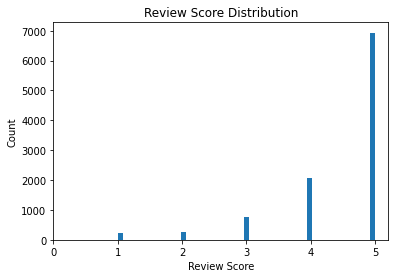

In [7]:
#Extract subset of data which we'll be working on
df = data[['reviewText', 'summary', 'overall']]
print(df.head())

#Observe that review score distribution is highly skewed towards 5 stars, having the highest count
plt.title('Review Score Distribution')

#Create histogram to show distribution of star ratings in reviews
bins = np.linspace(1, 5)
plt.hist(df['overall'], bins)
plt.xticks(np.arange(0, 6, 1))
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

## 1.3 Data Preparation and Cleaning

In [8]:
#Combine summary and review text into the same text line
df['text'] = df[['summary', 'reviewText']].apply(' '.join, axis=1)

#Drop summary and original text 
df.drop(['summary', 'reviewText'], axis=1, inplace=True)

df.head()

,overall,text
0,5.0,"good Not much to write about here, but it does..."
1,5.0,Jake The product does exactly as it should and...
2,5.0,It Does The Job Well The primary job of this d...
3,5.0,GOOD WINDSCREEN FOR THE MONEY Nice windscreen ...
4,5.0,No more pops when I record my vocals. This pop...


In [9]:
#Make a copy for use later
d = df.copy()

#Instantiate word stemmer and stopwords
ps = nltk.PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

#Function for cleaning text: Clean text of punctuations, convert to lower case, tokenize words, apply stemming and remove stopwords
def clean_text(txt):
    txt = "".join(data.lower() for data in txt if data not in string.punctuation)
    tokens = re.split("\W+", txt)
    cleaned = [ps.stem(word) for word in tokens if word not in stopwords]
    return cleaned

#Apply text cleaning function to text
df['text_clean'] = df['text'].apply(lambda x:clean_text(x))
df.drop(['text'], axis=1, inplace=True)

In [10]:
df.head()

,overall,text_clean
0,5.0,"[good, much, write, exactli, suppos, filter, p..."
1,5.0,"[jake, product, exactli, quit, affordablei, re..."
2,5.0,"[job, well, primari, job, devic, block, breath..."
3,5.0,"[good, windscreen, money, nice, windscreen, pr..."
4,5.0,"[pop, record, vocal, pop, filter, great, look,..."


# 2. Sentiment Analysis with Data Visualization
Bigrams were tokenized from original text to provide additional context, especially from pairs of words like "doesnt work", "not good" and "sounds good" etc.

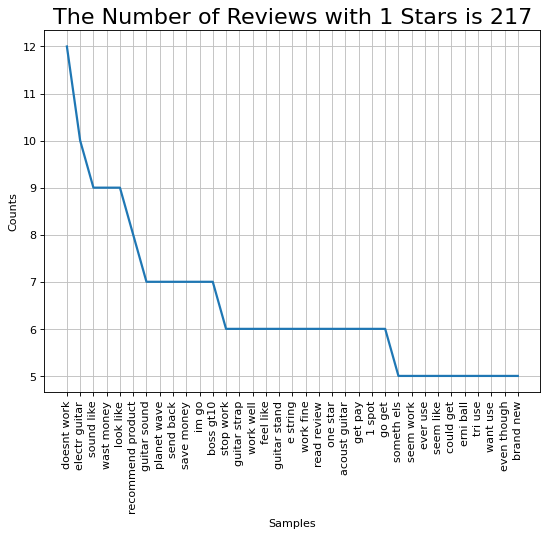

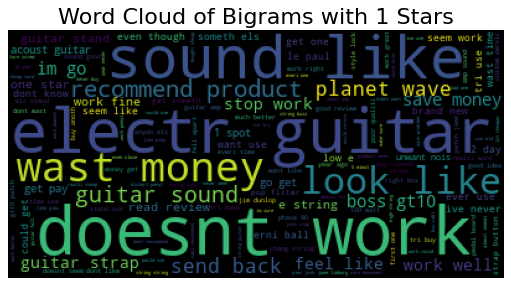

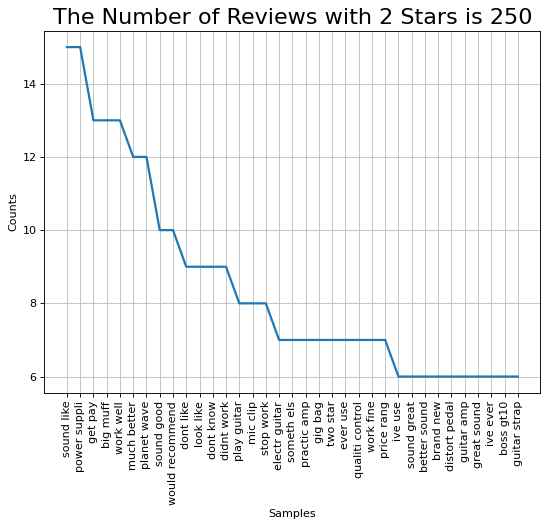

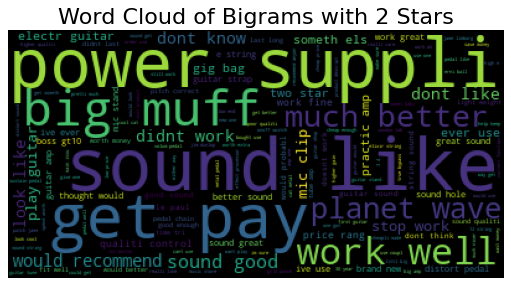

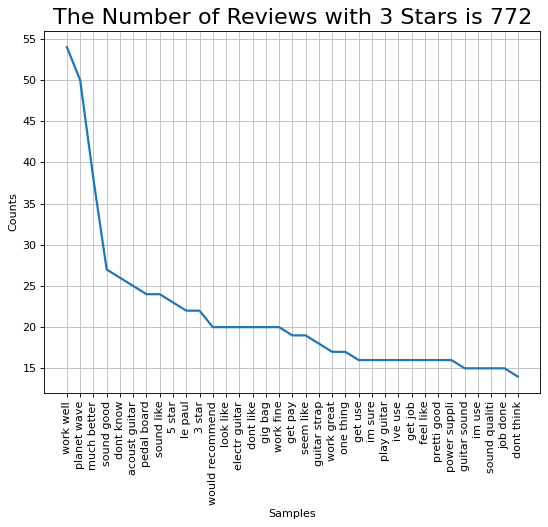

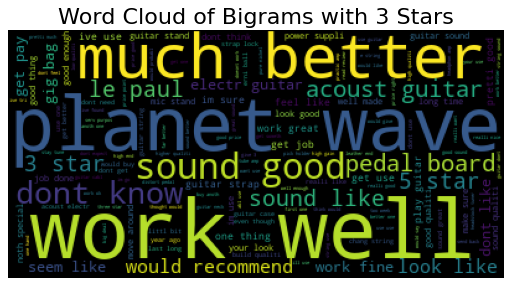

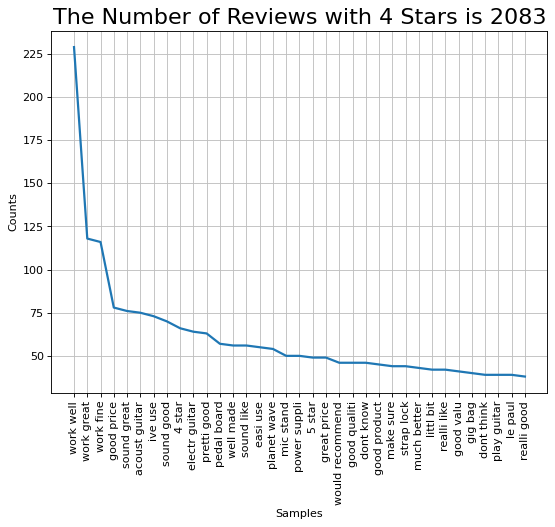

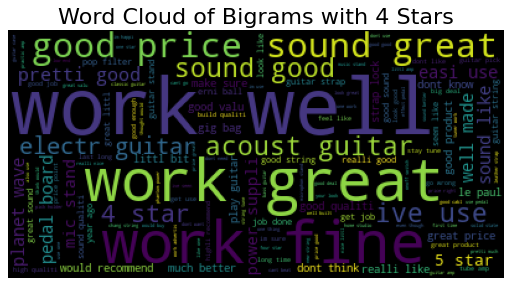

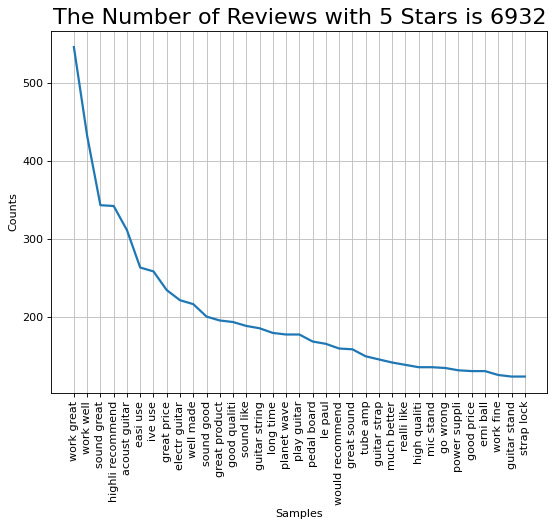

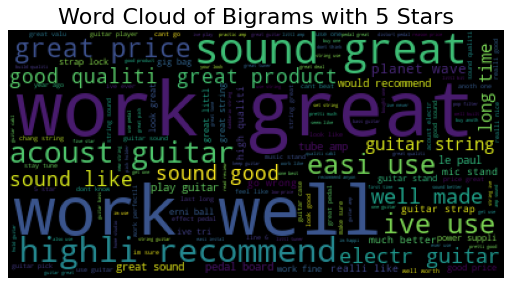

In [11]:
#Create a dictionary to store datasets corresponding to each star rating
dic = {5: df[df['overall']==5], 4: df[df['overall']==4], 3: df[df['overall']==3], 2: df[df['overall']==2], 1: df[df['overall']==1]}

#Create frequency distributions of words for each rating
for i in range(1, len(dic)+1):
    df = dic[i]
    #print("The number of reviews with {} stars is {}".format(i, df.shape[0]))
    
    #Generate bigrams from text
    df['string'] = df['text_clean'].apply(lambda x: ', '.join(x))
    df_text = [str(df['string'].str.cat(sep=', '))]
    bigrams = [b for l in df_text for b in zip(l.split(", ")[:-1], l.split(", ")[1:])]
    
    #Put all bigrams into a list
    text = []
    for j in range(len(bigrams)):
        tuple_text = " ".join(bigrams[j])
        text.append(tuple_text)
    
    #Generate frequency distribution plot of bigrams
    fd = FreqDist(text)
    plt.figure(figsize=(8, 6), dpi=80)
    plt.title("The Number of Reviews with {} Stars is {}".format(i, df.shape[0]), fontsize=20)
    fd.plot(35, cumulative=False)
    plt.show()
    
    #Generate wordcloud of bigrams
    #Create a "." separator to separate each bigram
    text_string = ".".join(text)
    wordcloud = WordCloud(regexp=r"\w[\w' ]+", collocations=False).generate(text_string)
    plt.figure(figsize=(8, 6), dpi=80)
    plt.imshow(wordcloud)
    plt.title("Word Cloud of Bigrams with {} Stars".format(i), fontsize=20)
    plt.axis("off")
    plt.show()

# 3. Feature Engineering
Exploring the possiblity of creating an additional feature for the machine learning model.  
A possible feature could be length of review.  
But there is no strong correlation found between length of review to positive/negative sentiment.

overall
1.0    462.511521
2.0    522.652000
3.0    492.187824
4.0    461.339894
5.0    389.317224
Name: text_len, dtype: float64


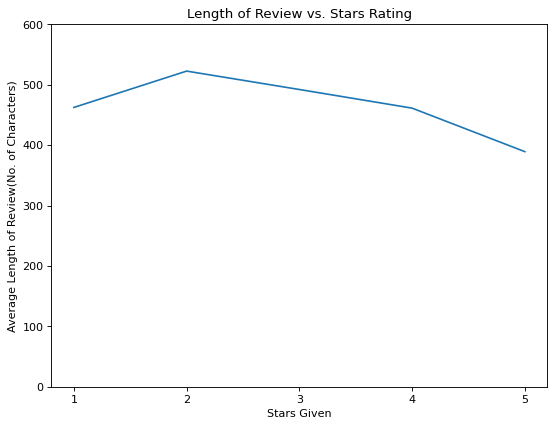

In [12]:
#Calculate review length minus whitespaces
d['text_len'] = d['text'].apply(lambda x: len(x) - x.count(" "))
average_rating = d.groupby('overall')['text_len'].mean()
print(average_rating)

#Create line plot of review length with respect to stars rating
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(average_rating)
plt.xticks(np.arange(1, 6, 1))
plt.title('Length of Review vs. Stars Rating')
plt.ylim([0, 600])
plt.xlabel('Stars Given')
plt.ylabel('Average Length of Review(No. of Characters)')
plt.show()

# 4. Machine Learning
## 4.1 Balancing the Datasets for Positive and Negative Sentiment
Since there is significantly more positive reviews than negative reviews, balancing the number of positive reviews to match the number of negative reviews is necessary.

In [13]:
#Function for separating positive and negative reviews in dataset
def pos_neg_separator(dataset, pos_rating_limit, neg_rating_limit):
    neg_data = dataset[dataset['overall']<=neg_rating_limit]
    neg_data['sentiment'] = 0
    neg_data.drop(columns=['overall'], inplace=True)
    pos_data = dataset[dataset['overall']>=pos_rating_limit]
    pos_data['sentiment'] = 1
    pos_data.drop(columns=['overall'], inplace=True)
    return pos_data, neg_data

#Function for balance the no. of rows of positive and negative sentiment data at random
def sampling_equalizer(dataset_1, dataset_2):
    if dataset_1.shape[0] == dataset_2.shape[0]:
        return dataset_1, dataset_2
    elif dataset_1.shape[0] < dataset_2.shape[0]:
        percent_reduction = (dataset_1.shape[0])/(dataset_2.shape[0])
        equalized_dataset, X_drop, y_drop, y_drop = train_test_split(dataset_2, dataset_2, train_size=percent_reduction, random_state=25)
        return dataset_1, equalized_dataset
    else:
        percent_reduction = (dataset_2.shape[0])/(dataset_1.shape[0])
        equalized_dataset, X_drop, y_drop, y_drop = train_test_split(dataset_1, dataset_1, train_size=percent_reduction, random_state=25)
        return equalized_dataset, dataset_2 
    
#Create balanced dataset for positive and negative sentiment datasets
pos, neg = pos_neg_separator(d, 4, 3)
eq_pos, eq_neg = sampling_equalizer(pos, neg)
fulldata = pd.concat([eq_pos, eq_neg], ignore_index=True)
print("There were {} rows of data with positive sentiment and {} rows of data with negative sentiment.".format(pos.shape[0], neg.shape[0]))
print("After equalizing the samples, there are {} rows of data with positive sentiment and {} rows of data with negative sentiment.".format(eq_pos.shape[0], eq_neg.shape[0]))
print("Total no. of rows of data is {}".format(fulldata.shape[0]))

There were 9015 rows of data with positive sentiment and 1239 rows of data with negative sentiment.
After equalizing the samples, there are 1239 rows of data with positive sentiment and 1239 rows of data with negative sentiment.
Total no. of rows of data is 2478


## 4.2 Feature Extraction with Term Frequency - Inverse Document Frequency Vectorizer (TF-IDF)
TF-IDF Vectorizer is used to convert words into numerical features and place weights on text based on importance and appearance frequency.  
Larger weightage is placed on words which appear less frequently in the reviews.


In [14]:
#Vectorize text data with TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(fulldata['text'])
X_features = pd.DataFrame(X_tfidf.toarray())

#Fit the vectorizer for future use with new predictions
predict_tfidf = tfidf_vect.fit(fulldata['text'])

print("The feature extraction process generated {} features from the dataset".format(X_features.shape[1]))
print("The number of rows remain the same at {}".format(X_features.shape[0]))

The feature extraction process generated 11146 features from the dataset
The number of rows remain the same at 2478


## 4.3 Model Hyperparameter Tuning with Grid Search and Cross Validation
We'll use the Random Forest Classifier model, which uses averaging to improve predictive accuracy and control over-fitting.  
Hyperparameters chosen are n_estimators (no. of decision trees used) and max_depth (max no. of node splits per tree).

In [15]:
#Function to print results of GridSearchCV
def print_results(results):
    print('BEST PARAMETERS ARE: {} with a mean test score of {}%\n'.format(results.best_params_, 100*round(results.cv_results_['mean_test_score'].max(), 3)))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('Accuracy score {} (+/-{}) for the parameters {}'.format(round(mean, 3), round(std*2, 3), params))
        
#Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_features, fulldata['sentiment'], test_size=0.2, random_state=25)

#GridSearchCV with the following combinations of hyperparameters for Random Forest model
param = {'n_estimators': [150, 300, 450],
         'max_depth': [30, 60, None]}

#Instantiate Random Forest Classifer 
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train, y_train)
print(print_results(gs_fit))

BEST PARAMETERS ARE: {'max_depth': 30, 'n_estimators': 300} with a mean test score of 77.9%

Accuracy score 0.768 (+/-0.03) for the parameters {'max_depth': 30, 'n_estimators': 150}
Accuracy score 0.779 (+/-0.046) for the parameters {'max_depth': 30, 'n_estimators': 300}
Accuracy score 0.776 (+/-0.049) for the parameters {'max_depth': 30, 'n_estimators': 450}
Accuracy score 0.763 (+/-0.023) for the parameters {'max_depth': 60, 'n_estimators': 150}
Accuracy score 0.77 (+/-0.033) for the parameters {'max_depth': 60, 'n_estimators': 300}
Accuracy score 0.775 (+/-0.025) for the parameters {'max_depth': 60, 'n_estimators': 450}
Accuracy score 0.77 (+/-0.037) for the parameters {'max_depth': None, 'n_estimators': 150}
Accuracy score 0.776 (+/-0.031) for the parameters {'max_depth': None, 'n_estimators': 300}
Accuracy score 0.776 (+/-0.026) for the parameters {'max_depth': None, 'n_estimators': 450}
None


## 4.4 Model Validation 
The ML model is called again with the decided hyperparameter combination based on results from GridSearchCV  
n_estimators = 450
max_depth = None

In [16]:
#Validate accuracy of model with test set, using hyperparameters with best test results from GridSearchCV
rf_final = RandomForestClassifier(n_estimators=450, max_depth=None, n_jobs=-1)
rf_fit = rf_final.fit(X_train, y_train)
y_predict = rf_fit.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy of the model is {}%".format(round(100*accuracy,3)))
f1_score = metrics.f1_score(y_test, y_predict)
print("f1 score of the model is {}".format(round(f1_score,3)))

Accuracy of the model is 74.194%
f1 score of the model is 0.737


## 4.5 Sample Prediction 
Here's the fun part! Make some predictions from new text the model has not seen before to predict positive/negative sentiment.

In [17]:
#List of sample text for predicting sentiment
txt = ["This cable is pretty bad, I cannot believe i bought it!", 
       "One of the best Fender stratocasters I have boughtm, worth every penny!!", 
       "Meh, I bought this amp due to a big discount on Amazon, but starting to regret it already.",
       "EQ button doesn't work, volume knob occasionally creating strange noises. Would not recommend",
       "I used to stick to a tubescreamer overdrive, but after purchasing this pedal, I'm gonna start using it for gigs more often. Sounds great! ",
       "Would not recommend anyone purchasing this cheap tuner.. plastic clip broke after a week of using",
       "I'm kinda on the fence with this one. The pedal sounds decent, but I think I will go for something else, maybe a better and heavier distortion pedal",
       "It is a cheap bass but it does the job well! Will recommend",
       "Great amp for the price, will recommend to any beginner to practice with. But if you are a pro, maybe look somewhere else!!"]

#Transform text data with TF-IDF
tfidf_predict = predict_tfidf.transform(txt)
predictors = pd.DataFrame(tfidf_predict.toarray())

#Make prediction with Random Forest model
y_predict = rf_fit.predict(predictors)

#Transform sentiment numerical values to words. 0 = negative sentiment, 1 = positive sentiment
pred_list = []
prediction_class = ["Negative", "Positive"]
for i in range(len(txt)):
    pred_list.append(prediction_class[y_predict[i]])

#Combine text and predicted results
result = pd.concat([pd.Series(txt), pd.Series(pred_list)], ignore_index=True, axis=1)
result.columns=['text', 'sentiment']
print(result)

                                                text sentiment
0  This cable is pretty bad, I cannot believe i b...  Negative
1  One of the best Fender stratocasters I have bo...  Positive
2  Meh, I bought this amp due to a big discount o...  Negative
3  EQ button doesn't work, volume knob occasional...  Negative
4  I used to stick to a tubescreamer overdrive, b...  Positive
5  Would not recommend anyone purchasing this che...  Negative
6  I'm kinda on the fence with this one. The peda...  Negative
7  It is a cheap bass but it does the job well! W...  Positive
8  Great amp for the price, will recommend to any...  Positive
